In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from math import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from helper import MA_generator, AR_generator, normalize, randomwalk1D, path_constructor

from setup.config_init import config

folder_path = config['PATH']['path_chapter1and2']

# to get 1.0 instead of np.float64(1.0)
np.set_printoptions(legacy="1.25")

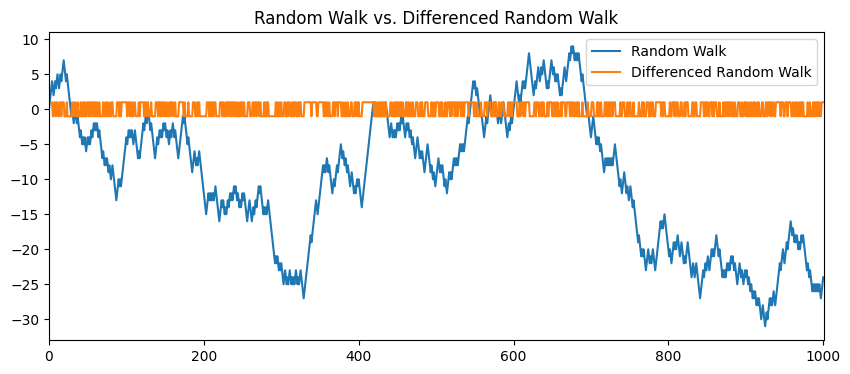

In [2]:
random_data = randomwalk1D(1000)
integrated_random_data = random_data - random_data.shift(1)

plt.figure(figsize=(10, 4))
plt.plot(random_data)
plt.plot(integrated_random_data)
plt.xlim(0, len(integrated_random_data)) # Adjust the x-axis scale
plt.legend(['Random Walk', 'Differenced Random Walk'])
plt.title('Random Walk vs. Differenced Random Walk')
plt.savefig(path_constructor(folder_path, 'random_walk'))

In [3]:
# nvidia ticker NVDA
prison = yf.download("CXW", start="2023-01-01", end="2024-12-13")
data_nvda = yf.download("NVDA", start="2022-01-01", end="2024-12-13")
data_msft = yf.download("MSFT", start="2021-01-01", end="2023-01-01")
diff_data_msft = (data_msft['Close'] / data_msft['Open']).apply(log)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


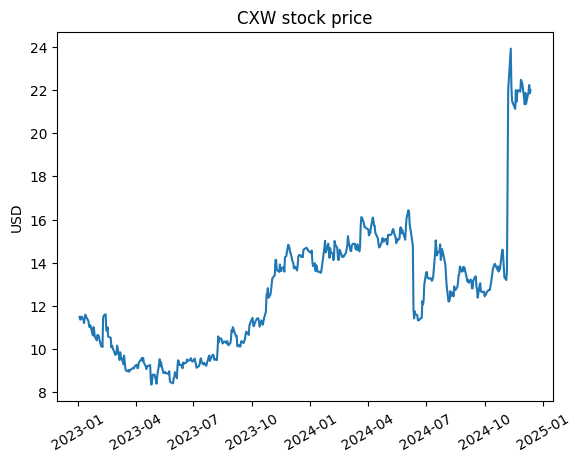

In [4]:
plt.title('CXW stock price')
plt.plot(prison['Close'])
plt.ylabel('USD')
plt.xticks(rotation=30)
plt.savefig(path_constructor(folder_path, 'cxw_stock_price'))

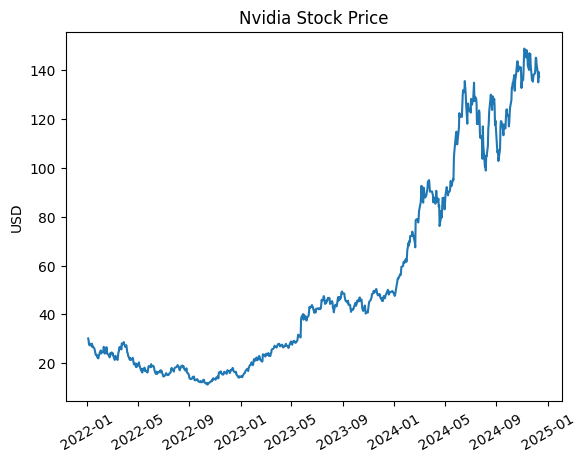

In [5]:
plt.title("Nvidia Stock Price")
plt.ylabel("USD")
plt.xticks(rotation=30)
plt.plot(data_nvda['Close'])
plt.savefig(path_constructor(folder_path, 'nvidia_stock_price'))

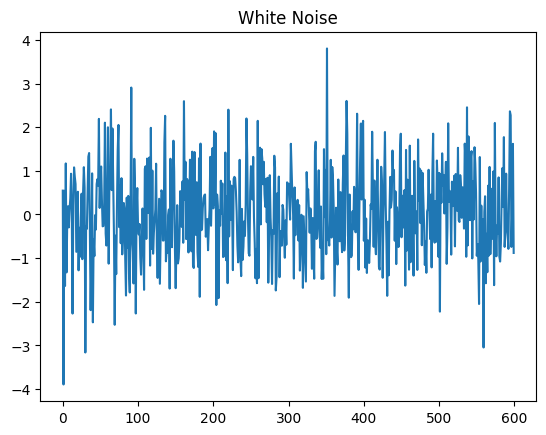

In [6]:
white_noise = np.random.normal(0,1,600)
plt.plot(white_noise)
plt.title("White Noise")
plt.savefig(path_constructor(folder_path, 'white_noise'))
plt.show()

In [7]:
def plot_acf_data_special(data, model, lags=20):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xticks(np.arange(0, lags + 1))
    ax.set_ylim(-1.1, 1.1)
    plot_acf(data, lags=lags, ax=ax)
    ax.set_title(f'ACF of {model}')
    return fig

def plot_pacf_data_special(data, model, lags=20):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xticks(np.arange(0, lags + 1))
    plot_pacf(data, lags=lags, ax=ax)
    ax.set_ylim(-1.1, 1.1)
    ax.set_title(f'PACF of {model}')
    return fig

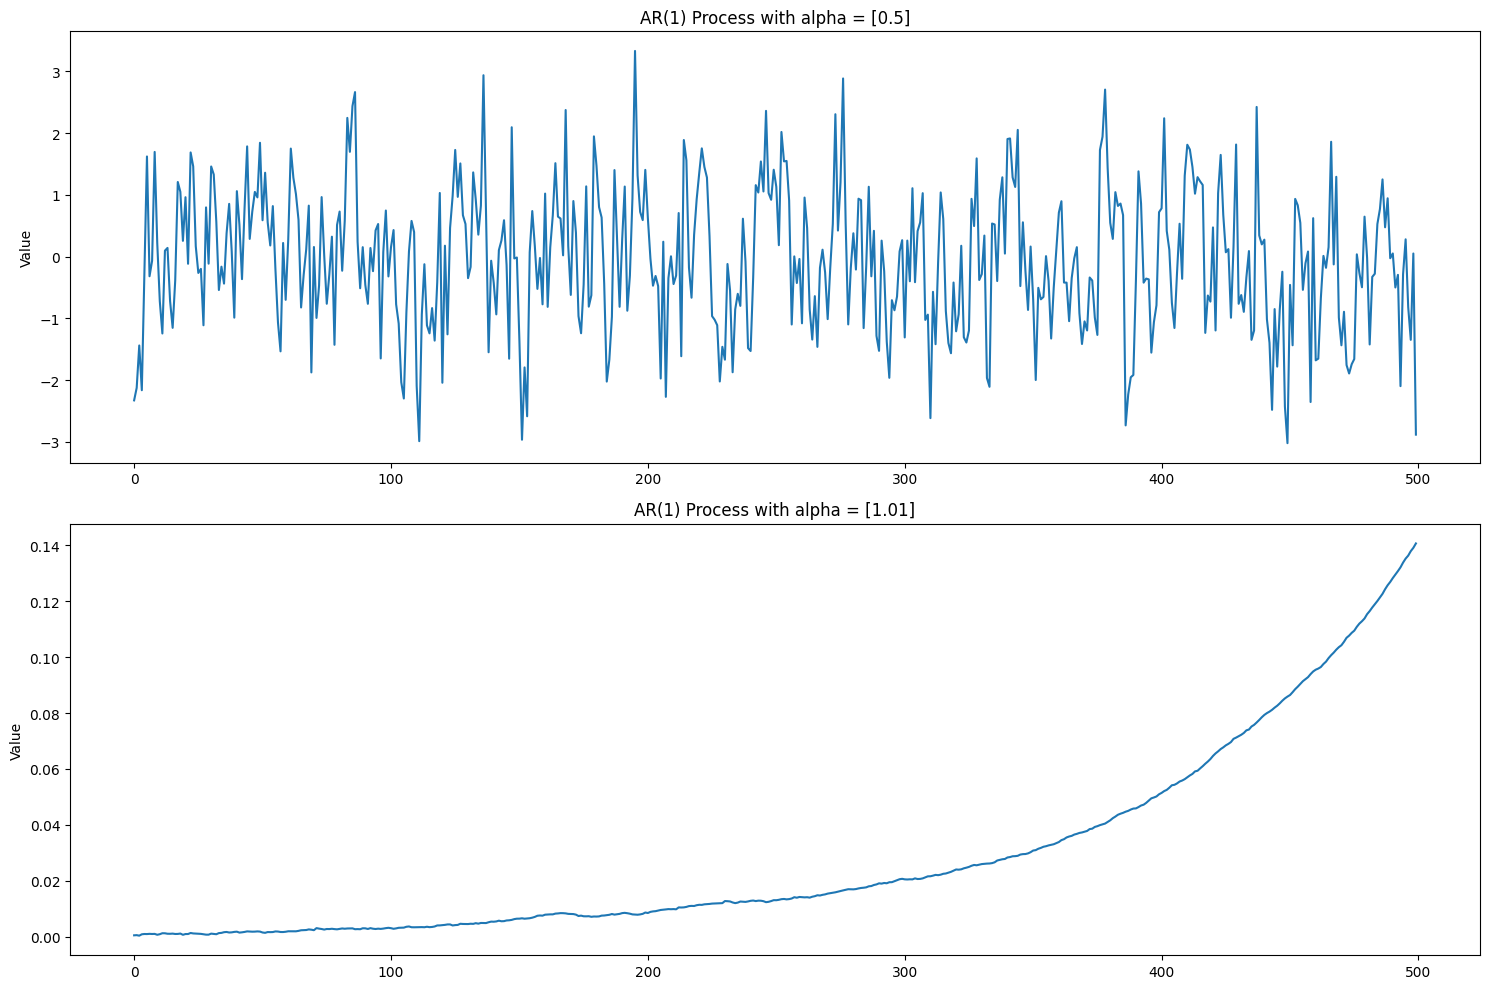

In [8]:
# Generate AR(1) data with alpha < 1
alpha_less_than_1 = np.array([0.5])
ar_data_less_than_1 = AR_generator(alpha_less_than_1, 500)

# Generate AR(1) data with alpha > 1
alpha_greater_than_1 = np.array([1.01])
ar_data_greater_than_1 = AR_generator(alpha_greater_than_1, 500)

# Plot the AR(1) processes
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# First subplot for alpha < 1
axs[0].set_title(f'AR({len(alpha_less_than_1)}) Process with alpha = {[alpha for alpha in alpha_less_than_1]}')
axs[0].plot(ar_data_less_than_1)
axs[0].set_ylabel('Value')

# Second subplot for alpha > 1
axs[1].set_title(f'AR({len(alpha_greater_than_1)}) Process with alpha = {[alpha for alpha in alpha_greater_than_1]}')
axs[1].plot(normalize(ar_data_greater_than_1))
axs[1].set_ylabel('Value')

plt.tight_layout()
plt.savefig(path_constructor(folder_path, 'ar1_processes'))
plt.show()


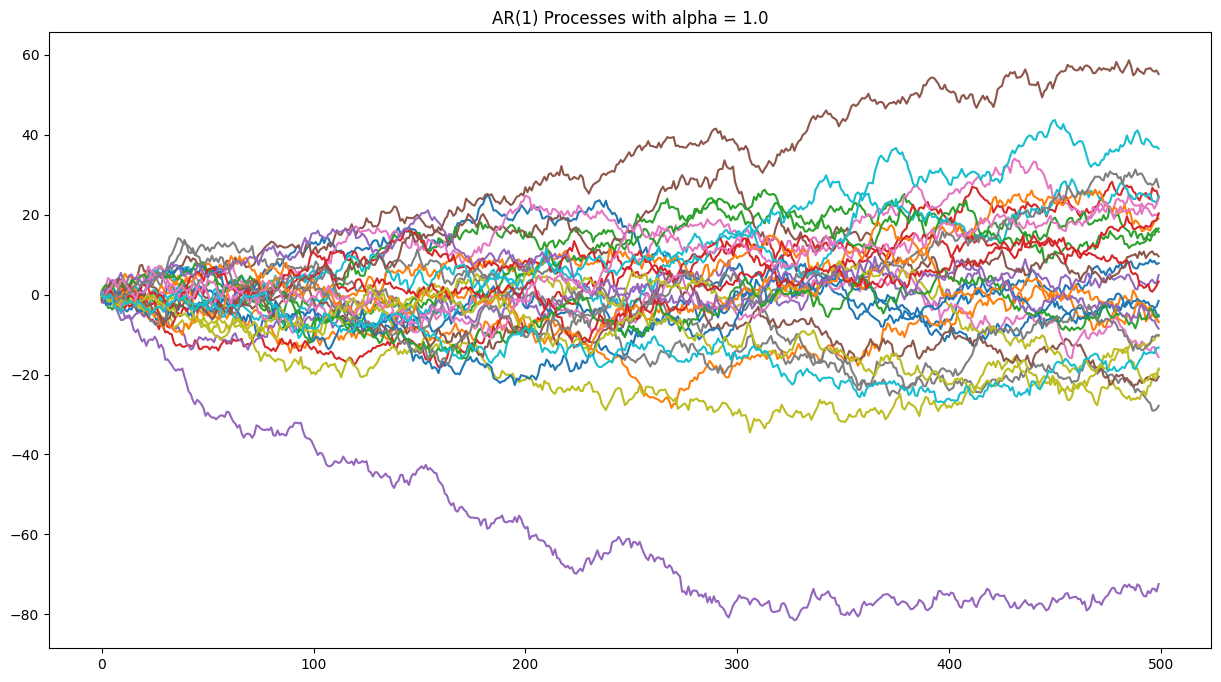

In [9]:
plt.figure(figsize=(15, 8))
for _ in range(30):
    data = AR_generator(np.array([1.0]), 500)
    plt.plot(data)
plt.title('AR(1) Processes with alpha = 1.0')
plt.savefig(path_constructor(folder_path, 'ar1_processes_alpha_1'))
plt.show()

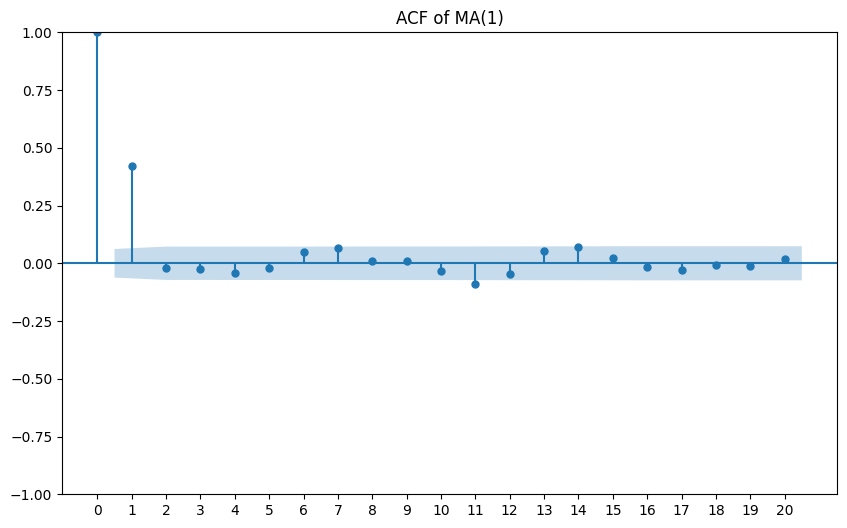

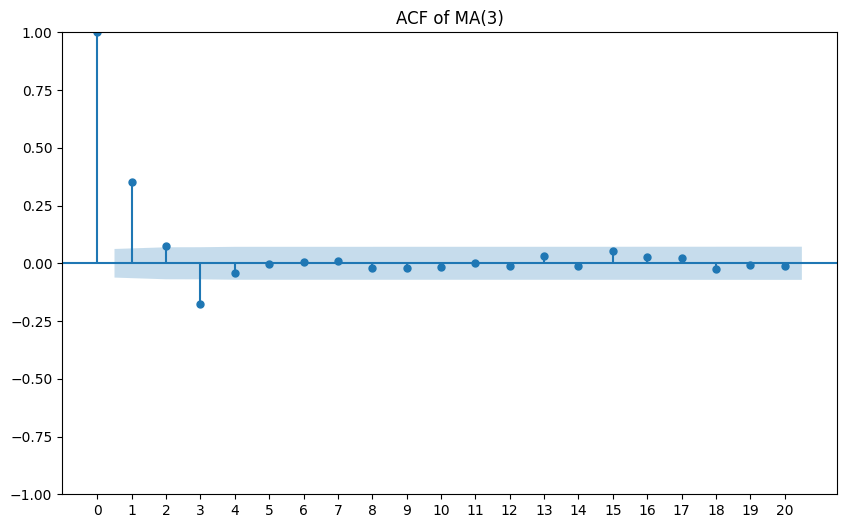

In [10]:
data_MA3 = MA_generator(np.array([0.4, 0.2, -0.2]), 1000)
data_MA1 = MA_generator(np.array([0.6]), 1000)
fig1 = plot_acf_data_special(data_MA1, 'MA(1)')
fig1.savefig(path_constructor(folder_path, 'acf_ma1'))
fig2 = plot_acf_data_special(data_MA3, 'MA(3)')
fig2.savefig(path_constructor(folder_path, 'acf_ma3'))


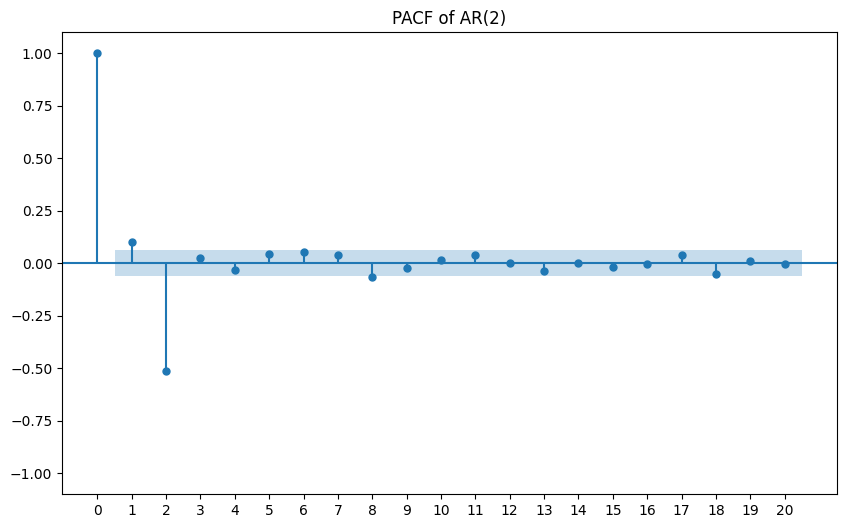

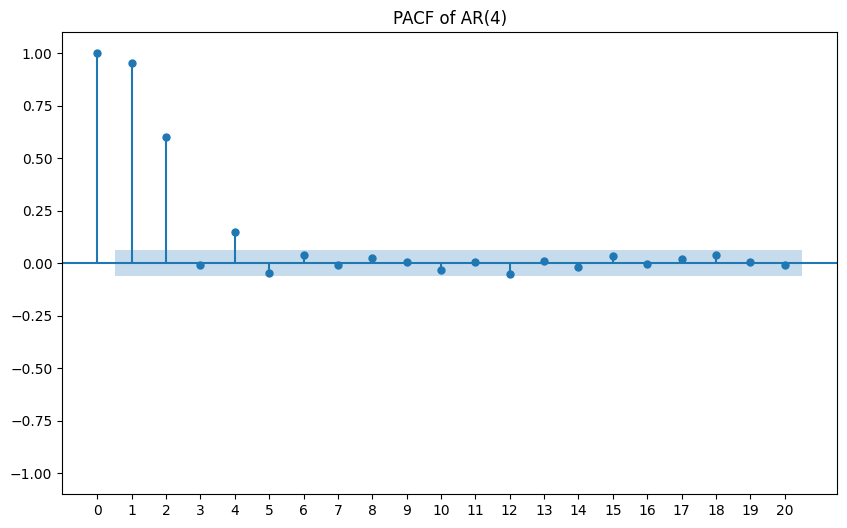

In [11]:
data_AR2 = AR_generator(np.array([0.1, -0.5]), 1000)
data_AR4 = AR_generator(np.array([0.2, 0.5, 0.1, 0.2]), 1000)

fig = plot_pacf_data_special(data_AR2, 'AR(2)')
fig.savefig(path_constructor(folder_path, 'pacf_ar2'))
plt.show()
plt.close(fig)

fig = plot_pacf_data_special(data_AR4, 'AR(4)')
fig.savefig(path_constructor(folder_path, 'pacf_ar4'))
plt.show()
plt.close(fig)
